In [113]:
# Create augmentations with original data
import csv

# File path with measurements 
# file_path_G1R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R1.csv'
# file_path_G1R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R2.csv'
# file_path_G1R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R3.csv'
# file_path_G2R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-24-2025_G2_R1.csv'
# file_path_G2R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-25-2025_G2_R2.csv'
file_path_G4R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-28-2025_G4_R2.csv'
#file_path_G4R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-27-2025_G4_R1.csv'

def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        n = 0
        data = []
        for i,row in enumerate(reader):
            data.append(row)
    return data

# data_G1R1 = read_data(file_path_G1R1)
# data_G1R2 = read_data(file_path_G1R2)
# data_G1R3 = read_data(file_path_G1R3)
# data_G2R1 = read_data(file_path_G2R1)
# data_G2R2 = read_data(file_path_G2R2)
data_G4R3 = read_data(file_path_G4R3)

In [115]:
# Poner todas las fuentes de datos en una lista
# all_data_sources = [data_G1R1, data_G1R2, data_G1R3, data_G2R1, data_G2R2, data_G2R3]

all_data_sources = [data_G4R3]
# Iterar sobre cada 'source' en 'all_data_sources',
# luego sobre cada 'item' en 'source',
# y añadir 'item' a la lista si 'item[1]' es '0'.
data = [item for source in all_data_sources for item in source if item[1] == '0.0']
#data1 = [item for source in all_data_sources for item in source if item[1] == '100']
print(len(data))

3


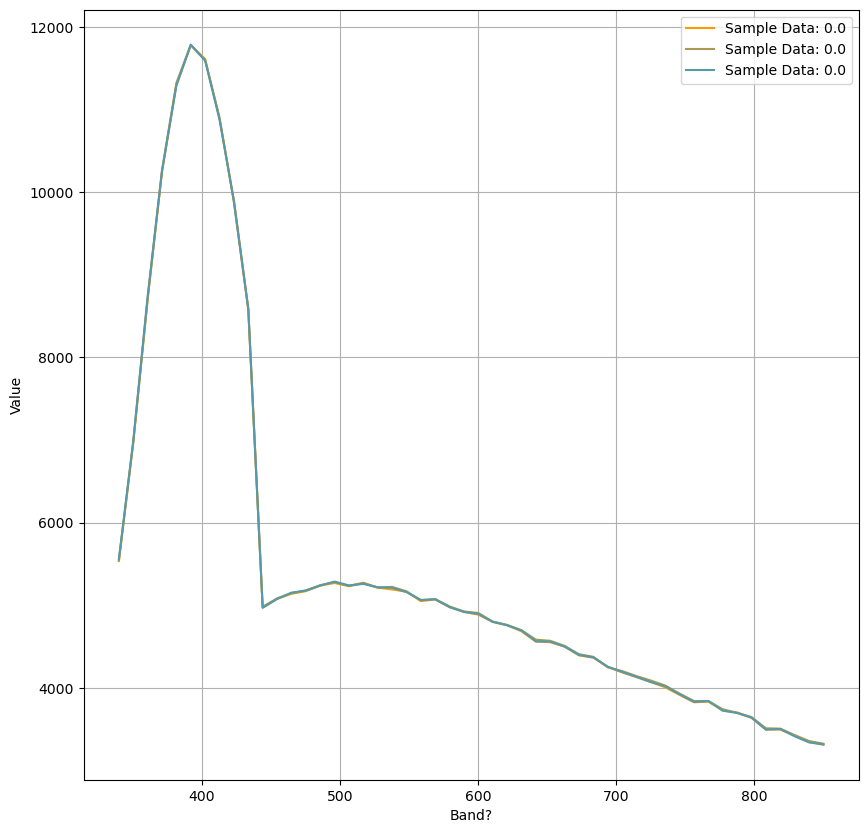

In [116]:
import matplotlib.pyplot as plt
import numpy as np

y_data = []
for i,y_i in enumerate(data): 
    y_row = []
    #print(len(y_i))
    for j in y_i[3:]:
        #print(j)
        if j != '-':
            y_row.append(float(j))
    y_data.append(y_row)

# y_data1 = []
# for i,y_i in enumerate(data1): 
#     y_row = []
#     #print(len(y_i))
#     for j in y_i[3:]:
#         #print(j)
#         if j != '-':
#             y_row.append(float(j))
#     y_data1.append(y_row)
    
#x_data = np.linspace(340,850,50)#len(y_data[0]))
x_data = np.linspace(340,850,50)#len(y_data[0]))
#print(len(x_data))

plt.figure(figsize=(10, 10))
prev_cc = y_data[0][1]
b_color = 0.0
r_color = 1.0
for i in range(len(data)):
#for i in range(3):
    cc = data[i][1]
    curr_cc = y_data[i][1]
    if prev_cc != curr_cc:
        b_color = 0.0 + (i/len(data))
        r_color = 1.0 - (i/len(data))
    plt.plot(x_data,y_data[i][:50], label='Sample Data: '+ str(cc), color=(r_color,0.6,b_color))
    prev_cc = curr_cc

# for i in range(len(data1)):
# #for i in range(3):
#     cc = data1[i][1]
#     curr_cc = y_data1[i][1]
#     if prev_cc != curr_cc:
#         g_color = 0.0 + (i/len(data1))
#         r_color = 1.0 - (i/len(data1))
#     plt.plot(x_data,y_data1[i], label='Sample Data: '+ str(cc), color=(r_color,g_color,0.6))
#     prev_cc = curr_cc

plt.xlabel('Band?')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
print("Tamaño de x_data:", len(x_data))
# Asumiendo que 'i' es 0 para la prueba, o usa un índice válido
print("Tamaño total de y_data[0]:", len(y_data[0]))
print("Tamaño del recorte y_data[0][50:]:", len(y_data[0][50:]))

Tamaño de x_data: 50
Tamaño total de y_data[0]: 100
Tamaño del recorte y_data[0][50:]: 50


In [82]:
# 2. Definición de las máscaras para los rangos
# Usamos máscaras booleanas para seleccionar los datos dentro de los rangos
mask_1 = (x_data >= 425) & (x_data <= 550)
mask_2 = (x_data >= 625) & (x_data <= 775)
print(len(mask_1))
# Extraemos los valores de x para cada rango
x_range1 = x_data[mask_1]
x_range2 = x_data[mask_2]

# Listas para guardar las áreas de cada curva individual
areas_500_600 = []
areas_600_700 = []

# 3. Iteración sobre tus curvas (y_data)
# Asumimos que 'y_data' es tu matriz completa de curvas
# Nota: Ajusta 'num_curves' al número real de curvas que tengas
for i in range(len(y_data)):
    # Extraemos la curva actual (asegurando que coincida en longitud con x_data)
    curve_y = y_data[i][50:] 
    print(len(curve_y))
    # Calculamos área 1 (500-600)
    y_r1 = np.array(curve_y)[mask_1]
    # np.trapz(y, x) calcula la integral numérica
    area_1 = np.trapz(y_r1, x_range1)
    areas_500_600.append(area_1)
    
    # Calculamos área 2 (600-700)
    y_r2 = np.array(curve_y)[mask_2]
    area_2 = np.trapz(y_r2, x_range2)
    areas_600_700.append(area_2)

# 4. Promedio final
avg_area_1 = np.mean(areas_500_600)
avg_area_2 = np.mean(areas_600_700)

print(f"Área promedio (500-600): {avg_area_1}")
print(f"Área promedio (600-700): {avg_area_2}")

50
50
50
50
Área promedio (500-600): 1078847.755102041
Área promedio (600-700): 1240666.9387755103


/var/folders/hd/994qssns5v71gyv5knr53vy00000gn/T/ipykernel_3537/482249154.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_1 = np.trapz(y_r1, x_range1)
/var/folders/hd/994qssns5v71gyv5knr53vy00000gn/T/ipykernel_3537/482249154.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_2 = np.trapz(y_r2, x_range2)


In [117]:
y_data_array = np.array(y_data)
print(np.max(y_data_array[:,:50]), np.argmax(y_data_array[2,:50]))
print(x_data[5])

11784.0 5
392.0408163265306


In [118]:

# 3. Iteración sobre tus curvas (y_data)
# Asumimos que 'y_data' es tu matriz completa de curvas
# Nota: Ajusta 'num_curves' al número real de curvas que tengas
area_g = []
for i in range(len(y_data)):
    # Extraemos la curva actual (asegurando que coincida en longitud con x_data)
    curve_y = y_data[i][:50] 
    print(len(curve_y))
    # Calculamos área 1 (500-600)
    y_r1 = np.array(curve_y)
    # np.trapz(y, x) calcula la integral numérica
    area_1 = np.trapz(y_r1, x_data)
    area_g.append(area_1)

# 4. Promedio final
avg_area_1 = np.mean(area_g)


print(f"Área promedio (dispersión): {avg_area_1}")
print(np.max(np.array(y_data)[:,:50]), np.argmax(np.array(y_data)[:,:50]))

#print(x_data[])


50
50
50
Área promedio (dispersión): 2810557.959183673
11784.0 55


/var/folders/hd/994qssns5v71gyv5knr53vy00000gn/T/ipykernel_3537/4154101866.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_1 = np.trapz(y_r1, x_data)


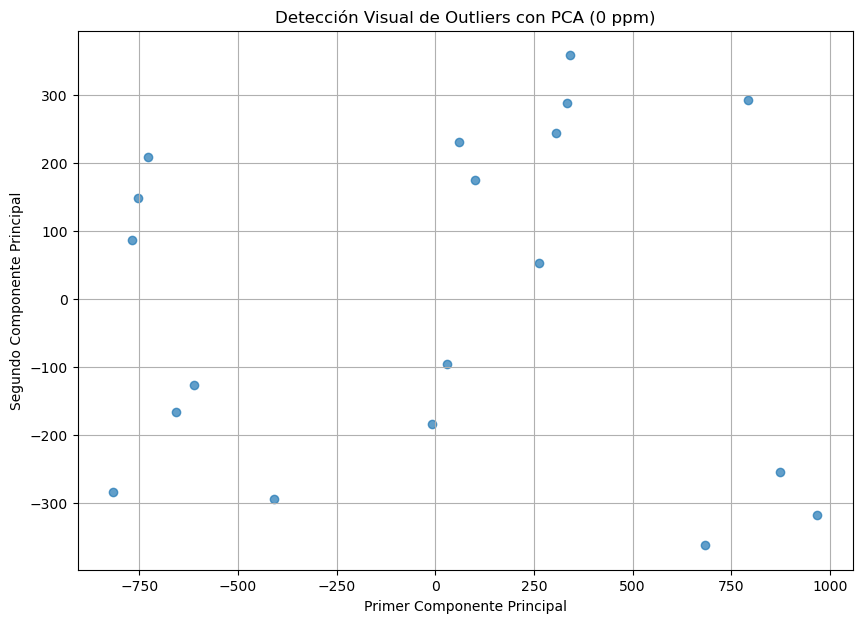

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Configurar y aplicar PCA directamente sobre y_data
# (Asumiendo que y_data ya está cargado y tiene la forma correcta)
pca = PCA(n_components=2)
y_data_pca = pca.fit_transform(y_data)

# 2. Graficar los resultados
plt.figure(figsize=(10, 7))
# Graficamos los nuevos datos transformados (y_data_pca)
plt.scatter(y_data_pca[:, 0], y_data_pca[:, 1], alpha=0.7)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Detección Visual de Outliers con PCA (0 ppm)')
plt.grid(True)
plt.show()

#

In [64]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Asumiendo que y_data es tu matriz (n_mediciones, 100 bandas)

# 1. Configurar el modelo
# 'contamination=0.05' asume que ~5% de tus datos son outliers.
# Puedes ajustar este valor (ej. 0.02 si son muy pocos) o dejarlo en 'auto'.
clf = IsolationForest(contamination=0.05, random_state=42)

# 2. Entrenar y predecir
# Devuelve '1' para puntos normales (inliers) y '-1' para outliers
preds = clf.fit_predict(y_data)

# 3. Obtener los índices de los outliers
outlier_indices = np.where(preds == -1)[0]

print(f"Total de mediciones: {len(y_data)}")
print(f"Índices de outliers encontrados: {outlier_indices}")
print(data[17])

Total de mediciones: 19
Índices de outliers encontrados: [6]
['Oct26_G2_R3', '100', '---', '5420.0', '6857.0', '8617.0', '10239.0', '11559.0', '12074.0', '11810.0', '10911.0', '9613.0', '8316.0', '4674.0', '4790.0', '4850.0', '4892.0', '4957.0', '4989.0', '4934.0', '4976.0', '4911.0', '4892.0', '4846.0', '4730.0', '4749.0', '4637.0', '4586.0', '4563.0', '4452.0', '4420.0', '4350.0', '4234.0', '4211.0', '4155.0', '4058.0', '4030.0', '3901.0', '3854.0', '3789.0', '3734.0', '3674.0', '3576.0', '3493.0', '3498.0', '3396.0', '3372.0', '3312.0', '3187.0', '3187.0', '3104.0', '3034.0', '3011.0', '-', '1934.0', '2538.0', '3303.0', '3779.0', '4152.0', '4135.0', '3970.0', '3743.0', '3694.0', '4655.0', '7510.0', '9919.0', '11511.0', '11169.0', '9919.0', '8750.0', '7527.0', '6362.0', '4939.0', '3650.0', '2850.0', '2200.0', '1823.0', '1711.0', '1636.0', '1760.0', '1836.0', '2080.0', '2512.0', '3392.0', '4886.0', '7118.0', '9448.0', '11022.0', '11680.0', '11871.0', '11138.0', '10404.0', '9439.0', '7

Datos cargados: 100 muestras.

Se encontraron 22 grupos de concentración únicos.
Concentration
0.0       5
7.0       5
57.0      4
107.0     6
157.0     5
207.0     6
257.0     4
307.0     5
357.0     3
407.0     4
457.0     5
507.0     6
557.0     4
607.0     6
657.0     4
707.0     4
757.0     3
807.0     3
857.0     6
907.0     3
957.0     5
1007.0    4
dtype: int64


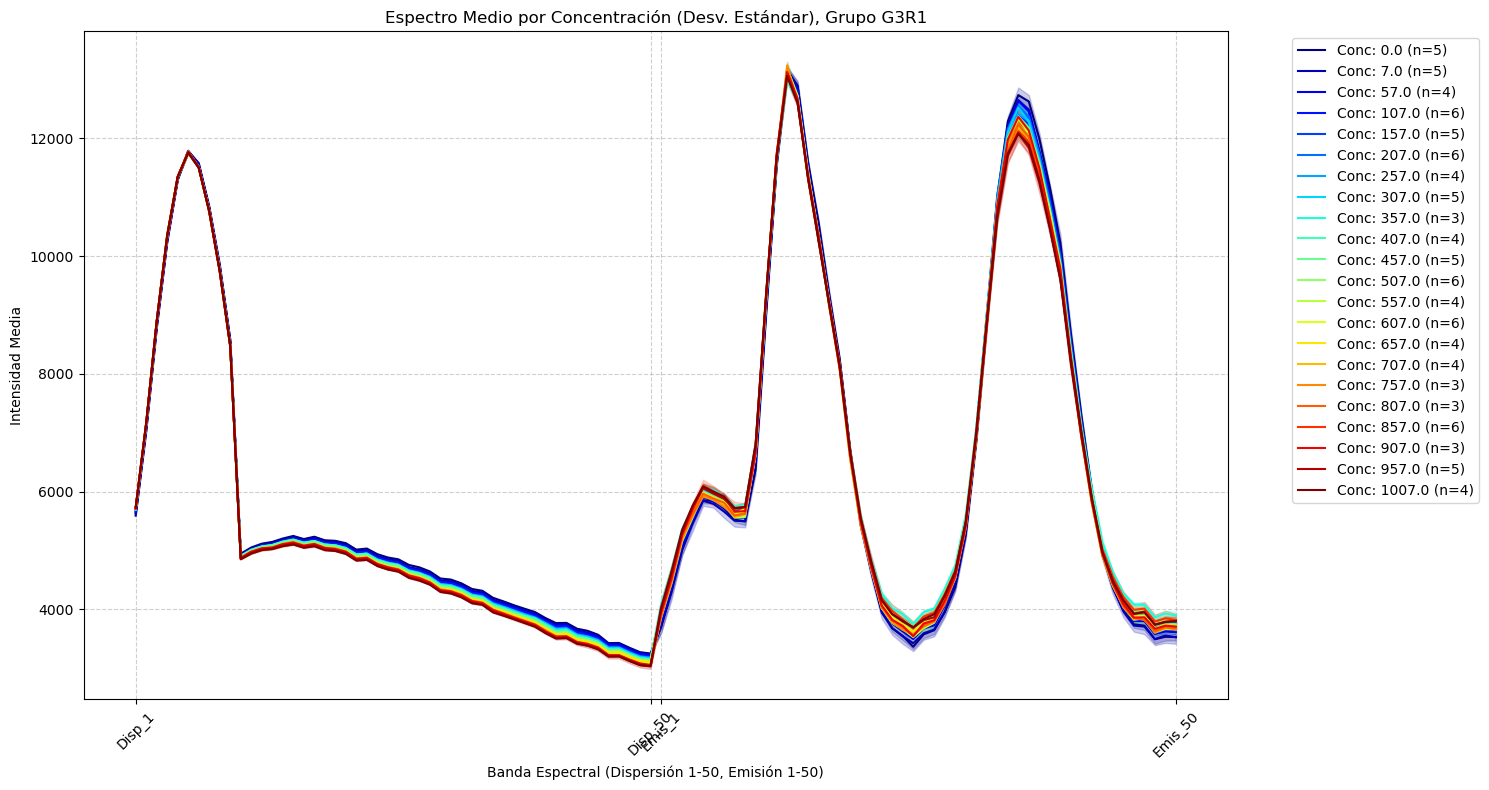

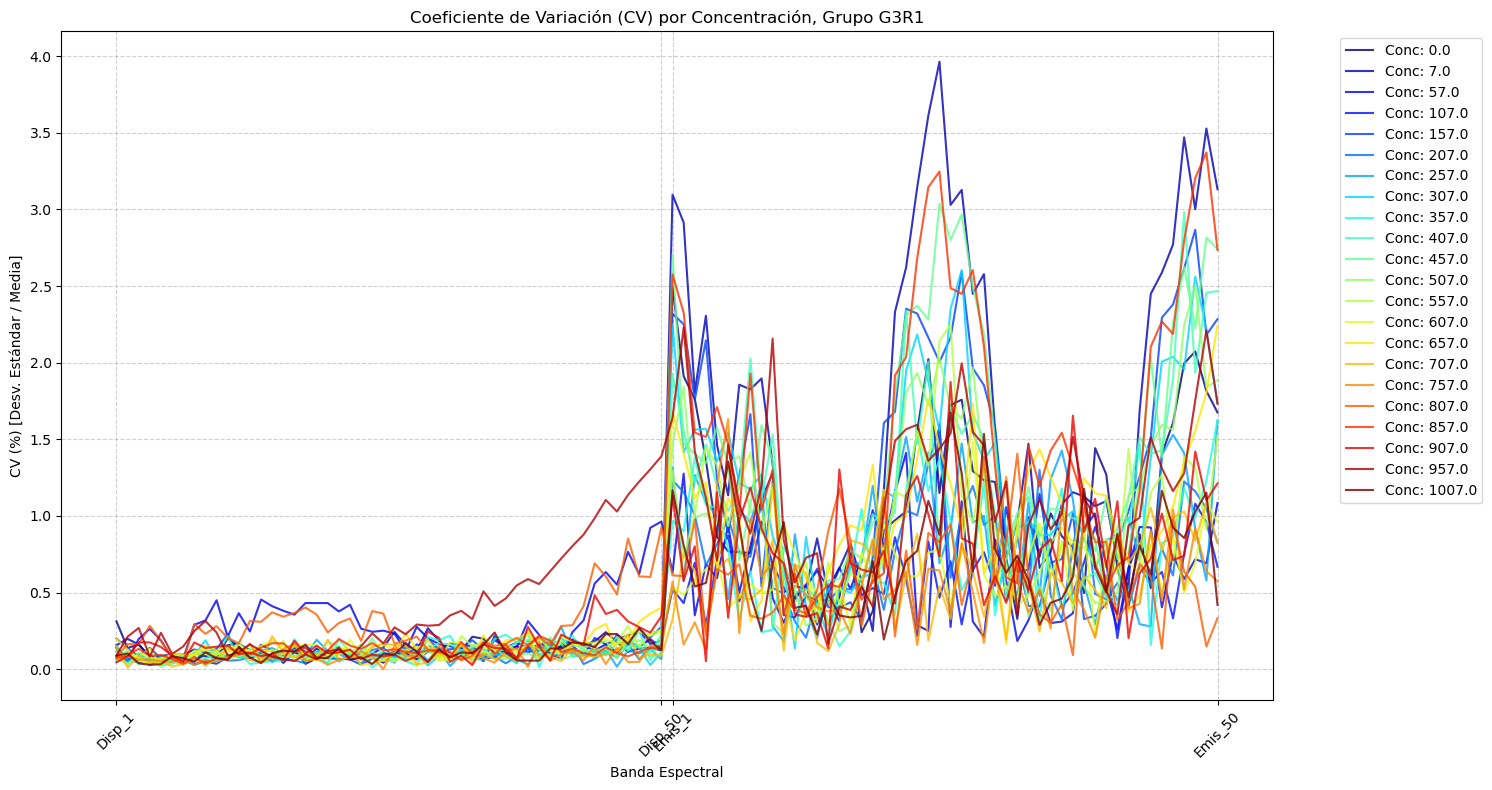

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración ---
# Actualiza esto con la ruta a tu archivo CSV
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R3.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-26-2025_G2_R3.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-16-2025_G3_R1.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-17-2025_G3_R1.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-17-2025_G3_R1_nOK.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-29-2025_G4_R3_clean.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/datosDisEmi.csv'
#FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/Scripts/dummy_spectrometer_data.csv'
FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/11-30-2025_G3_R1.csv'

G = FILE_PATH.split('.')[0].split('_')[-2]
R = FILE_PATH.split('.')[0].split('_')[-1]
substring = G + R
# Asumiendo que no hay encabezado en el CSV
HEADER = None
# ---------------------

def load_data_for_repetition(file_path):
    """
    Carga y preprocesa el archivo CSV, manteniendo la concentración como etiqueta.
    """
    try:
        data = pd.read_csv(file_path, header=HEADER)
        
        # Col 1: Concentración
        concentration = data.iloc[:, 1].astype(float)
        
        # Col 3-52: Dispersión (50 bandas)
        dispersion = data.iloc[:, 3:53].astype(float)
        
        # Col 54-103: Emisión (50 bandas)
        emission = data.iloc[:, 54:104].astype(float)
        
        # Combinar en un solo DataFrame
        features = pd.concat([dispersion, emission], axis=1)
        feature_names = [f'Disp_{i+1}' for i in range(50)] + [f'Emis_{i+1}' for i in range(50)]
        features.columns = feature_names
        
        # Añadir la concentración para agrupar
        features['Concentration'] = concentration
        
        print(f"Datos cargados: {features.shape[0]} muestras.")
        return features

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en {file_path}")
        return None
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None

def plot_mean_spectra(grouped_data):
    """
    Grafica el espectro medio para cada concentración con bandas de desviación estándar.
    """
    plt.figure(figsize=(15, 8))
    
    # Obtener un mapa de colores para las concentraciones
    colors = plt.cm.jet(np.linspace(0, 1, grouped_data.ngroups))
    
    for (concentration, group), color in zip(grouped_data, colors):
        # Excluir la columna 'Concentration' del cálculo
        spectra = group.drop('Concentration', axis=1)
        
        mean_spectrum = spectra.mean(axis=0)
        std_spectrum = spectra.std(axis=0)
        
        # Graficar la media
        plt.plot(mean_spectrum.index, mean_spectrum, label=f'Conc: {concentration} (n={len(group)})', color=color)
        
        # Graficar la banda de +/- 1 Desviación Estándar
        plt.fill_between(mean_spectrum.index, 
                         mean_spectrum - std_spectrum, 
                         mean_spectrum + std_spectrum, 
                         color=color, alpha=0.2)

    plt.title('Espectro Medio por Concentración (Desv. Estándar), Grupo '+substring)
    plt.xlabel('Banda Espectral (Dispersión 1-50, Emisión 1-50)')
    plt.ylabel('Intensidad Media')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Poner marcas en el eje x para que sea legible
    tick_locations = [0, 49, 50, 99] # Inicio/Fin Dispersión, Inicio/Fin Emisión
    tick_labels = ['Disp_1', 'Disp_50', 'Emis_1', 'Emis_50']
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_coefficient_of_variation(grouped_data):
    """
    Grafica el Coeficiente de Variación (CV) para cada concentración.
    CV = Desviación Estándar / Media
    """
    plt.figure(figsize=(15, 8))
    
    colors = plt.cm.jet(np.linspace(0, 1, grouped_data.ngroups))
    
    for (concentration, group), color in zip(grouped_data, colors):
        spectra = group.drop('Concentration', axis=1)
        
        mean_spectrum = spectra.mean(axis=0)
        std_spectrum = spectra.std(axis=0)
        
        # Calcular Coeficiente de Variación. 
        # Añadir un 'epsilon' para evitar división por cero si la media es 0.
        epsilon = 1e-9
        cv_spectrum = (std_spectrum / (mean_spectrum + epsilon)) * 100 # en porcentaje
        
        plt.plot(cv_spectrum.index, cv_spectrum, label=f'Conc: {concentration}', color=color, alpha=0.8)

    plt.title('Coeficiente de Variación (CV) por Concentración, Grupo '+substring)
    plt.xlabel('Banda Espectral')
    plt.ylabel('CV (%) [Desv. Estándar / Media]')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Poner marcas en el eje x
    tick_locations = [0, 49, 50, 99]
    tick_labels = ['Disp_1', 'Disp_50', 'Emis_1', 'Emis_50']
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def main():
    features_df = load_data_for_repetition(FILE_PATH)
    
    if features_df is None:
        return
        
    # Agrupar por la columna 'Concentration'
    grouped = features_df.groupby('Concentration')
    
    print(f"\nSe encontraron {grouped.ngroups} grupos de concentración únicos.")
    print(grouped.size())
    
    # --- Visualización ---
    
    # 1. Gráfico de Espectros Medios
    #    Responde: ¿Se ven diferentes los espectros promedio de cada concentración?
    #    Si las bandas sombreadas (desv. estándar) se solapan mucho,
    #    será difícil para el modelo distinguirlas.
    plot_mean_spectra(grouped)
    
    # 2. Gráfico de Coeficiente de Variación (CV)
    #    Responde: ¿Qué tan ruidosas son las mediciones para una misma concentración?
    #    Un CV alto (ej. > 10-20%) en bandas clave puede indicar un problema
    #    de repetibilidad que está afectando a tu RNN.
    plot_coefficient_of_variation(grouped)

if __name__ == "__main__":
    main()

Datos cargados exitosamente desde dummy_spectrometer_data.csv
Total de mediciones (filas) encontradas: 83
Extrayendo datos de las filas: 67, 68, y 69...
Comparando Fila 67 (Medición 1) con Fila 68 (Medición 2) y Fila 69 (Medición 3)...


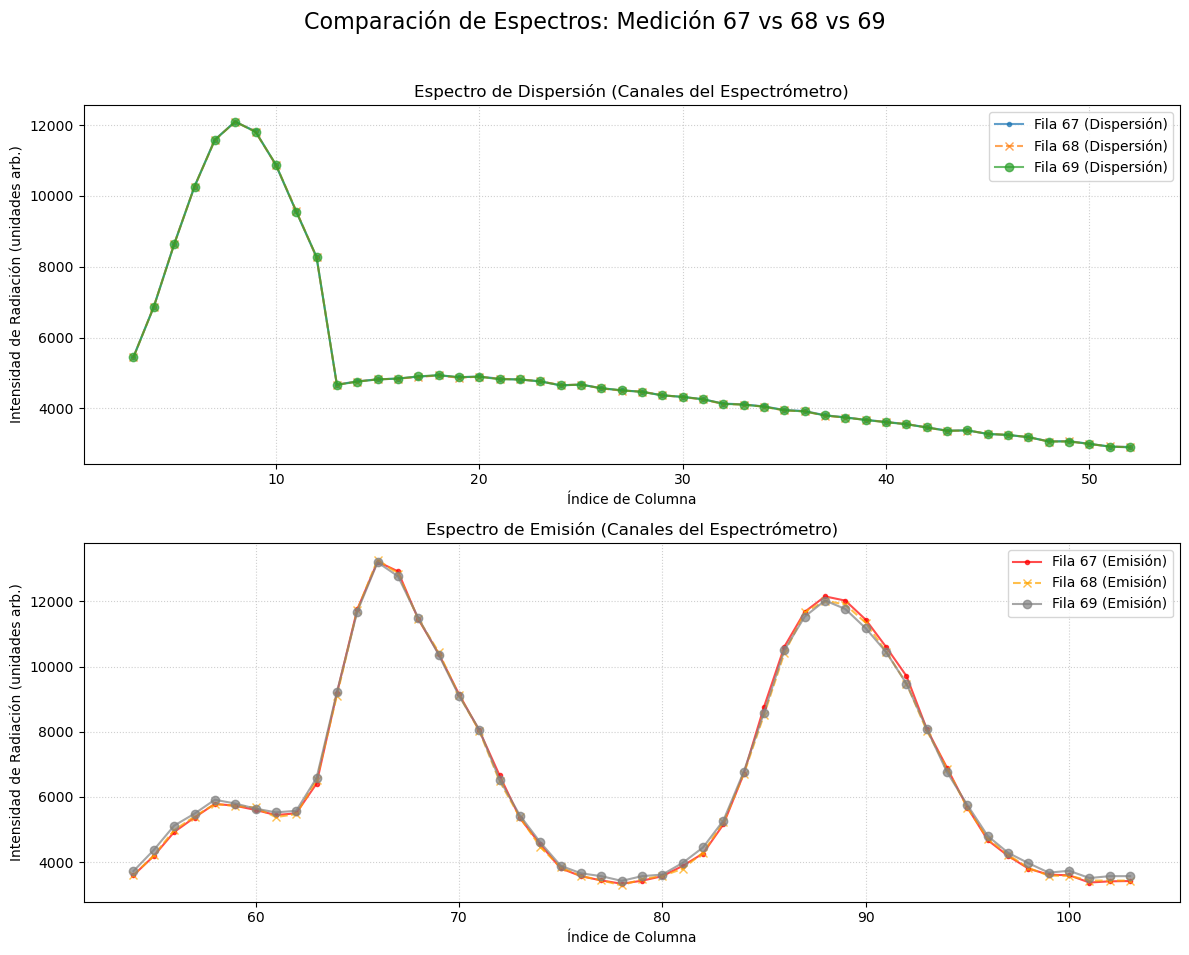

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sys
import os
import numpy as np # Necesario para el código de generación dummy

# --- Constantes Definidas por el Usuario ---
# Índices de las columnas (basado en índice 0)
DISPERSION_START = 3
DISPERSION_END = 53
EMISSION_START = 54
EMISSION_END = 104
# ----------------------------------------

def load_data(filepath):
    """
    Carga los datos desde un archivo CSV.
    """
    try:
        # Nota: La lectura usa header=None, lo que asume que la columna de índice (si existe) 
        # también es parte de los datos si no se usa index_col=False. 
        # Ya que se usa .iloc, esto suele funcionar bien.
        data = pd.read_csv(filepath, header=None)
        print(f"Datos cargados exitosamente desde {filepath}")
        print(f"Total de mediciones (filas) encontradas: {len(data)}")
        return data
    except FileNotFoundError:
        print(f"Error: El archivo '{filepath}' no fue encontrado.", file=sys.stderr)
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: El archivo '{filepath}' está vacío.", file=sys.stderr)
        return None
    except Exception as e:
        print(f"Error inesperado al cargar {filepath}: {e}", file=sys.stderr)
        return None

def extract_spectra(data, row_index):
    """
    Extrae los espectros de dispersión y emisión para una fila dada.
    """
    try:
        # Extraer datos usando .iloc para indexación basada en posición
        # Se agrega +1 al límite superior si se quiere que el END sea inclusivo en el rango de columnas,
        # pero como las constantes ya parecen estar ajustadas para la indexación de Python (exclusiva),
        # las mantendremos así por ahora, asumiendo que DISPERSION_END y EMISSION_END son el límite superior (exclusivo).
        
        # Si las constantes representan los *últimos índices de columna* que se quieren incluir, 
        # entonces el rango debe ser (START : END + 1). Asumiendo que las constantes son el límite exclusivo.
        dispersion_data = data.iloc[row_index, DISPERSION_START:DISPERSION_END].astype(float)
        emission_data = data.iloc[row_index, EMISSION_START:EMISSION_END].astype(float)
        
        return dispersion_data, emission_data
    except IndexError:
        print(f"Error: El índice de fila {row_index} está fuera de los límites (Total de filas: {len(data)}).", file=sys.stderr)
        return None, None
    except Exception as e:
        print(f"Error extrayendo espectros para la fila {row_index}: {e}", file=sys.stderr)
        return None, None

def plot_comparison(d_spec1, d_spec2, d_spec3, e_spec1, e_spec2, e_spec3, idx1, idx2, idx3):
    """
    Genera gráficos comparativos para los espectros de dispersión y emisión de tres mediciones.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle(f"Comparación de Espectros: Medición {idx1} vs {idx2} vs {idx3}", fontsize=16)
    
    # --- Gráfico de Dispersión ---
    # Crear un eje x basado en el índice de columnas
    dispersion_x = range(DISPERSION_START, DISPERSION_END)
    ax1.plot(dispersion_x, d_spec1, label=f"Fila {idx1} (Dispersión)", marker='.', linestyle='-', alpha=0.7)
    ax1.plot(dispersion_x, d_spec2, label=f"Fila {idx2} (Dispersión)", marker='x', linestyle='--', alpha=0.7)
    ax1.plot(dispersion_x, d_spec3, label=f"Fila {idx3} (Dispersión)", marker='o', linestyle='-', alpha=0.7)
    ax1.set_title("Espectro de Dispersión (Canales del Espectrómetro)")
    ax1.set_xlabel("Índice de Columna")
    ax1.set_ylabel("Intensidad de Radiación (unidades arb.)")
    ax1.legend()
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # --- Gráfico de Emisión ---
    emission_x = range(EMISSION_START, EMISSION_END)
    ax2.plot(emission_x, e_spec1, label=f"Fila {idx1} (Emisión)", marker='.', linestyle='-', alpha=0.7, color='red')
    ax2.plot(emission_x, e_spec2, label=f"Fila {idx2} (Emisión)", marker='x', linestyle='--', alpha=0.7, color='orange')
    
    # ********************************
    # CORRECCIÓN CLAVE AQUÍ:
    # Se debe usar ax2.plot para el tercer espectro de emisión (e_spec3)
    # y NO ax1.plot (que es el gráfico de Dispersión).
    # ********************************
    ax2.plot(emission_x, e_spec3, label=f"Fila {idx3} (Emisión)", marker='o', linestyle='-', alpha=0.7, color='gray') # <--- CORREGIDO
    
    ax2.set_title("Espectro de Emisión (Canales del Espectrómetro)")
    ax2.set_xlabel("Índice de Columna")
    ax2.set_ylabel("Intensidad de Radiación (unidades arb.)")
    ax2.legend()
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # Guardar y mostrar
    plt.show() # Descomentada para mostrar el gráfico directamente

def main(filepath, row_idx1, row_idx2, row_idx3):
    """
    Función principal para ejecutar la comparación de tres espectros.
    """
    data = load_data(filepath)
    if data is None:
        return

    # Validar índices de fila (se incluye el tercer índice)
    if not (0 <= row_idx1 < len(data) and 0 <= row_idx2 < len(data) and 0 <= row_idx3 < len(data)):
        print(f"Error: Los índices de fila deben estar entre 0 y {len(data) - 1}.", file=sys.stderr)
        return

    # Extraer datos para las tres mediciones
    print(f"Extrayendo datos de las filas: {row_idx1}, {row_idx2}, y {row_idx3}...")
    d_spec1, e_spec1 = extract_spectra(data, row_idx1)
    d_spec2, e_spec2 = extract_spectra(data, row_idx2)
    d_spec3, e_spec3 = extract_spectra(data, row_idx3)
    
    if any(spec is None for spec in [d_spec1, e_spec1, d_spec2, e_spec2, d_spec3, e_spec3]):
        print("No se pudieron extraer los datos completos para las tres mediciones. Abortando.", file=sys.stderr)
        return
        
    print(f"Comparando Fila {row_idx1} (Medición 1) con Fila {row_idx2} (Medición 2) y Fila {row_idx3} (Medición 3)...")

    # Generar gráficos
    plot_comparison(d_spec1, d_spec2, d_spec3, e_spec1, e_spec2, e_spec3, row_idx1, row_idx2, row_idx3)

if __name__ == "__main__":
    # --- Parámetros de Entrada ---
    FILENAME = "dummy_spectrometer_data.csv" 
    
    # 2. Índices de las filas a comparar (basado en 0)
    idx1 = 0
    idx2 = 1 
    idx3 = 2 # <--- TERCER ÍNDICE AÑADIDO
    # ---------------------------
    
    # Verifica si el archivo dummy existe y, si no, lo crea (se ha modificado ligeramente la lógica para la fila 2)
    if FILENAME == "dummy_spectrometer_data.csv" and not os.path.exists(FILENAME):
        print("Creando archivo CSV de ejemplo: 'dummy_spectrometer_data.csv'...")
        # Generar datos dummy
        num_cols = 110
        num_rows = 10
        
        # Crear datos base
        # Se ajusta el tamaño del array para que coincida con el rango END - START (53-3=50, 104-54=50)
        disp_len = DISPERSION_END - DISPERSION_START 
        em_len = EMISSION_END - EMISSION_START
        
        base_dispersion = 50 + np.sin(np.linspace(0, 5, disp_len)) * 20 + np.random.rand(disp_len) * 5
        base_emission = 100 * np.exp(-((np.arange(em_len) - 20) ** 2) / (2 * 10**2)) + np.random.rand(em_len) * 10
        
        dummy_data = []
        for i in range(num_rows):
            row = np.random.rand(num_cols) * 10 # Columnas de ruido/metadata
            
            # Insertar espectros
            row[DISPERSION_START:DISPERSION_END] = base_dispersion + np.random.rand(disp_len) * (i*0.5+1) # Ruido creciente
            row[EMISSION_START:EMISSION_END] = base_emission + np.random.rand(em_len) * (i*0.5+1)
            
            # Simular descalibración/cambio
            if i == 1:
                # Fila 1: Introducir un offset y ruido
                row[DISPERSION_START:DISPERSION_END] += 15
                row[EMISSION_START:EMISSION_END] *= 1.3
            elif i == 2:
                # Fila 2: Un cambio de forma
                row[DISPERSION_START:DISPERSION_END] *= 0.8 # Disminución de amplitud
                row[EMISSION_START:EMISSION_END] = 150 * np.exp(-((np.arange(em_len) - 10) ** 2) / (2 * 5**2)) + np.random.rand(em_len) * 10 # Pico movido
                
            dummy_data.append(row)
            
        df_dummy = pd.DataFrame(dummy_data)
        df_dummy.to_csv(FILENAME, header=False, index=False)
        print("Archivo de ejemplo creado.")

    # Ejecutar el análisis principal
    # Se ajustan los índices de llamada a la función principal
    idx = 67 
    main(FILENAME, idx, idx+1, idx+2)